# Dealing with Spin in PyProcar bandsplot

This tutorial provides a comprehensive guide to handling different spin configurations when plotting band structures using PyProcar's `bandsplot` function. Understanding how PyProcar handles spin is crucial for correctly interpreting and visualizing electronic band structures in magnetic materials.

## Understanding Spin in PyProcar

PyProcar handles spin differently depending on the type of magnetic calculation:

### Spin-Polarized Case
In spin-polarized calculations (collinear magnetism), the spin-up and spin-down channels are separate entities. This means:
- There are **two distinct spin channels** (spin-up and spin-down)
- Each spin channel has its own set of bands and eigenvalues
- Each spin channel has its own corresponding orbital projections
- The bands for different spins are typically plotted with different colors or styles
- You can analyze spin-up and spin-down contributions independently

### Non-Collinear Case  
In non-collinear magnetic calculations, the situation is more complex:
- Spin-up and spin-down can **no longer be treated in isolation**
- There is only **1 spin channel** (the total system)
- However, there are **4 spin projections** corresponding to:
  - **Total magnetization** (scalar)
  - **sx** (x-component of spin)
  - **sy** (y-component of spin) 
  - **sz** (z-component of spin)
- These projections provide information about the local magnetic moments and their orientations

This tutorial will demonstrate how to plot and analyze band structures for both cases.



## 1. Setup and Data Loading


In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
SPIN_POL_PATH = "data/examples/bands/spin-polarized"
NON_COLLINEAR_PATH = "data/examples/bands/non-colinear"
pyprocar.download_from_hf(relpath=SPIN_POL_PATH, output_path=CURRENT_DIR)
pyprocar.download_from_hf(relpath=NON_COLLINEAR_PATH, output_path=CURRENT_DIR)
SPIN_POL_DATA_DIR = CURRENT_DIR / SPIN_POL_PATH
NON_COLLINEAR_DATA_DIR = CURRENT_DIR / NON_COLLINEAR_PATH
print(f"Data downloaded to: {SPIN_POL_DATA_DIR}")
print(f"Data downloaded to: {NON_COLLINEAR_DATA_DIR}")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lllang\\Desktop\\notebooks\\Notebook\\01 - Projects\\Pyprocar\\pyprocar\\examples\\00-band_structure\\.cache\\huggingface\\download\\data\\examples\\00-band_structure\\OnAzjC82fwyW0vtpfXZPWpiEseU=.226387cafbf20a208c81b4aae410c9c31383c13fe17e30aafe3ff5659f2e1408.incomplete'

## 2. Spin-Polarized Band Structure Plotting

In this section, we'll explore how to plot spin-polarized band structures using both plain and parametric modes. Spin-polarized calculations provide separate bands for spin-up and spin-down electrons.


### 2.1 Plain Mode - Basic Spin-Polarized Plot

In plain mode, PyProcar plots the band structure without any orbital projections. For spin-polarized systems, this will show both spin channels with different colors.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in plain mode


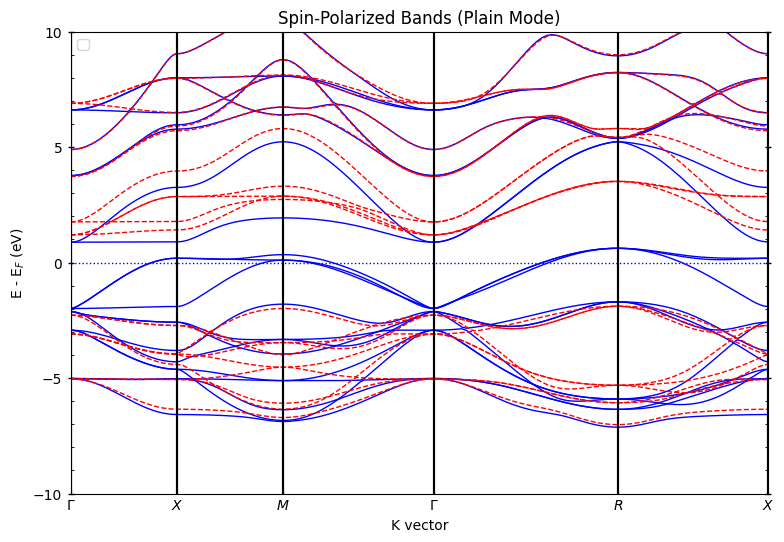

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Spin-Polarized Bands (Plain Mode)'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [3]:
# Plot spin-polarized bands in plain mode
pyprocar.bandsplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    elimit=[-10, 10],  # Energy range around Fermi level
    title='Spin-Polarized Bands (Plain Mode)',
    quiet_welcome=True
)


## 1. Plain Mode - Basic Band Structure Plot

The **plain mode** is the simplest way to visualize band structures. It shows the electronic bands without any additional projections or coloring, giving you a clean view of the band structure.

**What you'll see:**
- Electronic bands as simple lines
- High-symmetry k-points labeled on the x-axis  
- Energy (eV) on the y-axis
- Fermi level indicated as a horizontal line

## 2.2 Customizing the Plot

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in plain mode


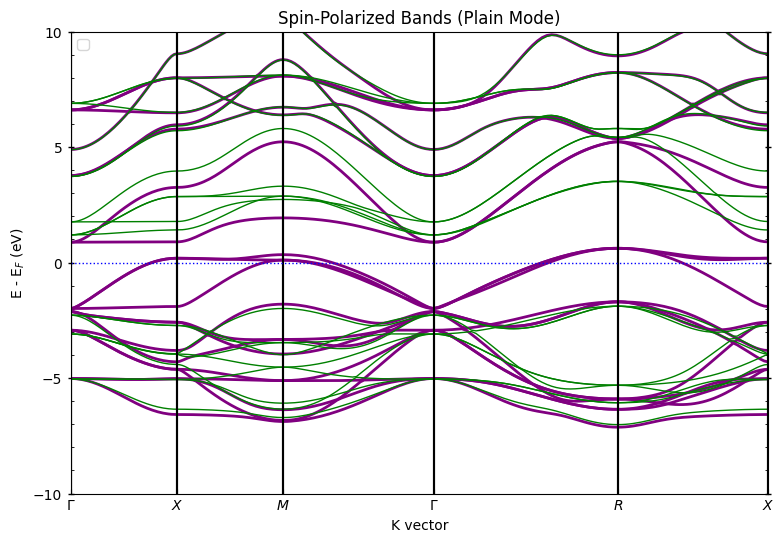

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Spin-Polarized Bands (Plain Mode)'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [4]:
# Plot spin-polarized bands in plain mode
pyprocar.bandsplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    elimit=[-10, 10],  # Energy range around Fermi level
    spin_colors=('purple', 'green'), # Customize the colors for each spin channel
    linestyle=('solid', 'solid'), # Customize the linestyle for each spin channel
    linewidth=(2, 1), # Customize the linewidth for each spin channel
    # opacity=(1, 0.5), # Customize the opacity for each spin channel
    title='Spin-Polarized Bands (Plain Mode)',
    quiet_welcome=True
)

### 2.2 Parametric Mode - Spin-Polarized with Orbital Projections

In parametric mode, we can visualize the orbital character of the bands while maintaining the spin separation. This is particularly useful for understanding which orbitals contribute to specific bands in each spin channel.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


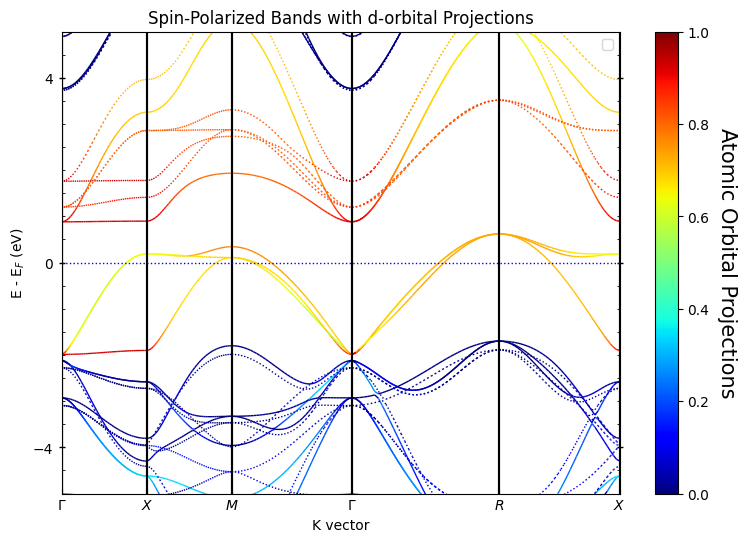

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Spin-Polarized Bands with d-orbital Projections'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [5]:
# Plot spin-polarized bands with d-orbital projections
pyprocar.bandsplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    linestyle=('solid', 'dotted'),
    elimit=[-5, 5],
    title='Spin-Polarized Bands with d-orbital Projections',
    quiet_welcome=True
)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


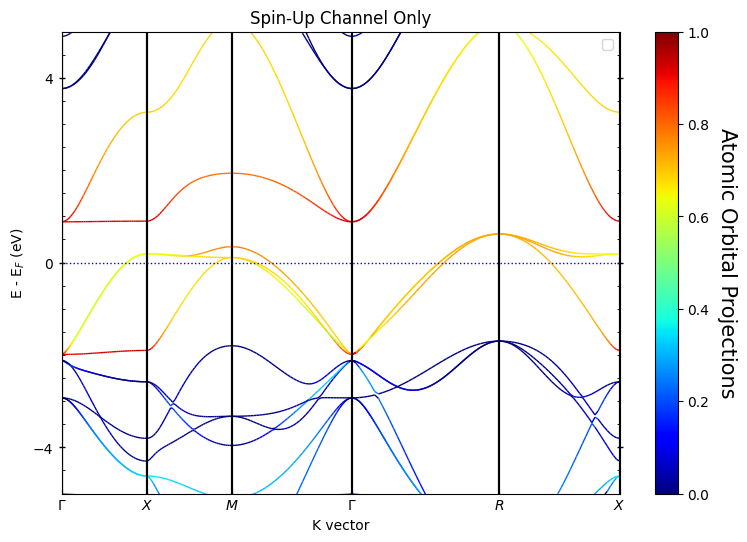

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Spin-Up Channel Only'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [6]:
# You can also plot specific spin channels separately
# Plot only spin-up channel
pyprocar.bandsplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    linestyle=('solid', 'dotted'),
    spins=[0],  # Only spin-up (index 0)
    elimit=[-5, 5],
    title='Spin-Up Channel Only',
    quiet_welcome=True
)


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


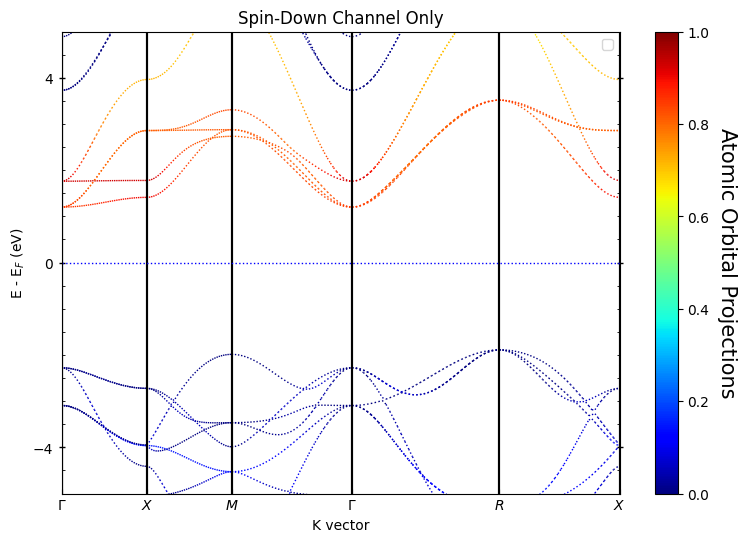

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Spin-Down Channel Only'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [7]:
# Plot only spin-down channel
pyprocar.bandsplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    linestyle=('solid', 'dotted'),
    spins=[1],  # Only spin-down (index 1)
    elimit=[-5, 5],
    title='Spin-Down Channel Only',
    quiet_welcome=True
)


## 3. Non-Collinear Band Structure Plotting

In non-collinear magnetic systems, the spin quantization axis is not fixed, and spin-up and spin-down states are mixed. PyProcar handles this by providing spin projections (total, sx, sy, sz).


### 3.1 Plain Mode - Non-Collinear Bands

First, let's plot the basic band structure without any projections:


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in plain mode


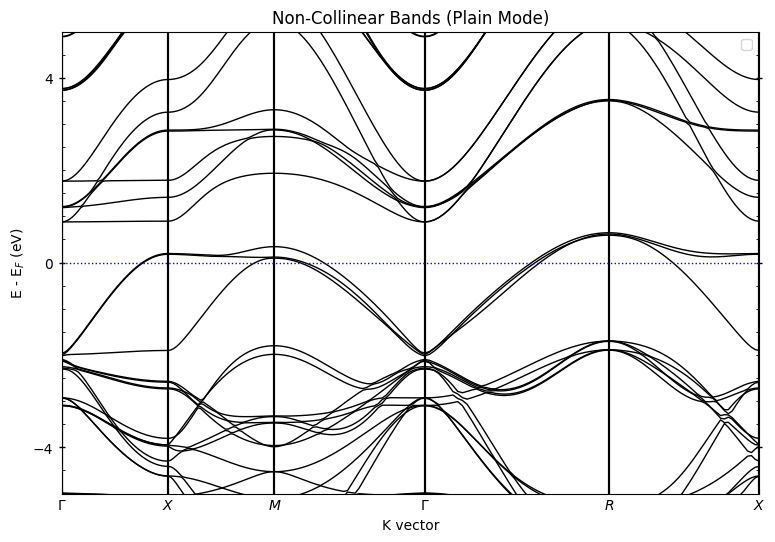

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Non-Collinear Bands (Plain Mode)'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [8]:
# Plot non-collinear bands in plain mode
pyprocar.bandsplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    elimit=[-5, 5],
    title='Non-Collinear Bands (Plain Mode)',
    use_cache=True,
    quiet_welcome=True
)


### 3.2 Spin Projections - Total Magnetization

In non-collinear systems, there are four spin projections. The spins argument is a list of indices that correspond to the spin channels you want to plot.

- Total magnetization: `spins=[0]`
- Sx magnetization: `spins=[1]`
- Sy magnetization: `spins=[2]`
- Sz magnetization: `spins=[3]`


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


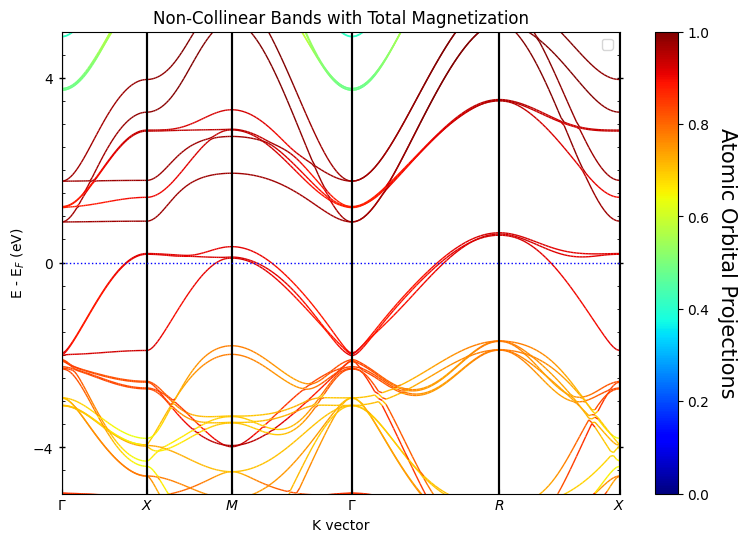

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Non-Collinear Bands with Total Magnetization'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [9]:
# Plot with total magnetization projection
pyprocar.bandsplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[0],
    elimit=[-5, 5],
    title='Non-Collinear Bands with Total Magnetization',
    quiet_welcome=True
)


### 3.3 Spin Component Projections

We can also visualize the individual spin components (sx, sy, sz) to understand the spatial orientation of the magnetic moments:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


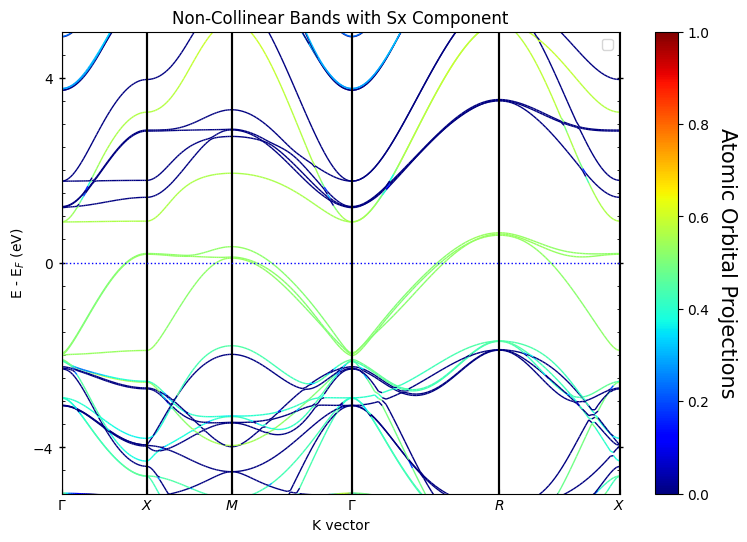

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Non-Collinear Bands with Sx Component'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [10]:
# Plot with sx component (x-direction spin)
pyprocar.bandsplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[1],
    elimit=[-5, 5],
    title='Non-Collinear Bands with Sx Component',
    quiet_welcome=True
)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


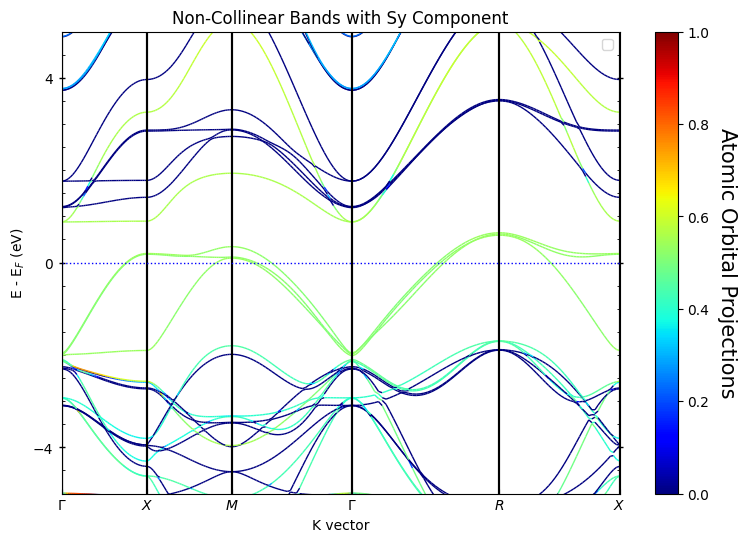

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Non-Collinear Bands with Sy Component'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [11]:
# Plot with sy component (y-direction spin)
pyprocar.bandsplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[2],
    elimit=[-5, 5],
    title='Non-Collinear Bands with Sy Component',
    quiet_welcome=True
)


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Plotting bands in parametric mode


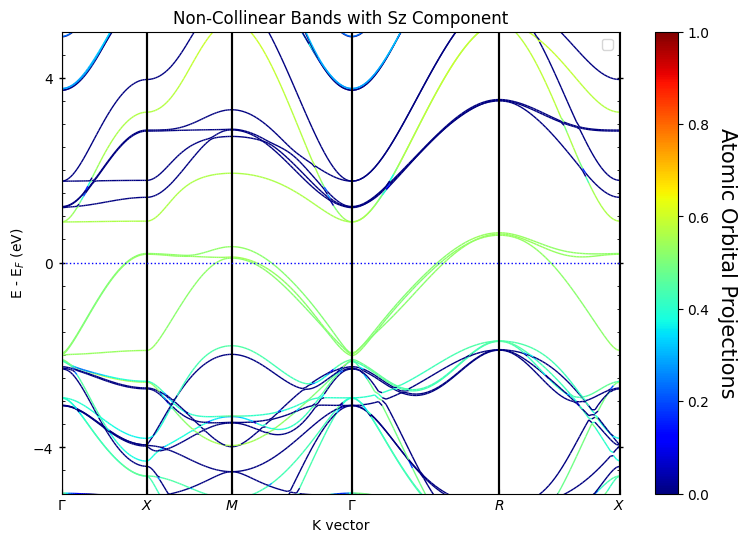

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'Non-Collinear Bands with Sz Component'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [12]:
# Plot with sz component (z-direction spin)
pyprocar.bandsplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[3],
    elimit=[-5, 5],
    title='Non-Collinear Bands with Sz Component',
    quiet_welcome=True
)


## 4. Summary

This tutorial demonstrated how to handle different spin configurations in PyProcar:

### Key Takeaways:

**Spin-Polarized Systems:**
- Use `spins=[0]` for spin-up channel only
- Use `spins=[1]` for spin-down channel only  
- Use `spins=[0,1]` or omit the parameter for both channels
- Each spin channel is treated as a separate entity with its own bands and projections

**Non-Collinear Systems:**
- Use `mode='parametric'` to visualize spin projections
- Available spin projections: `'total'`, `'sx'`, `'sy'`, `'sz'`
- Only one spin channel exists, but with 4 different spin projections
- Useful for understanding magnetic anisotropy and spin orientation

### Best Practices:
- Always check your calculation type (spin-polarized vs non-collinear) before plotting
- Use appropriate energy limits (`elimit`) to focus on relevant energy ranges
- Consider which atoms and orbitals are most relevant for your analysis
- For non-collinear systems, compare different spin components to understand the full magnetic structure
